In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

from pylab import *

import pandas as pd

import numpy as np


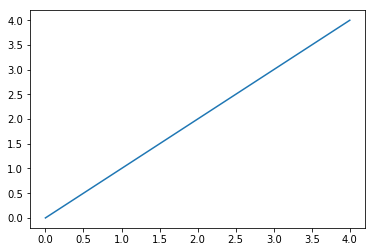

In [3]:
plt.plot(arange(5))

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

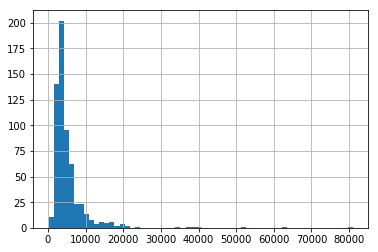

In [9]:
df['ApplicantIncome'].hist(bins=60)

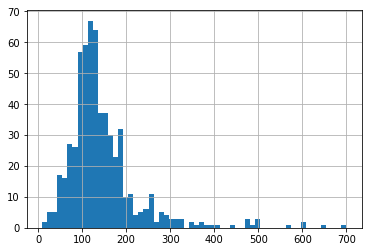

In [10]:
df['LoanAmount'].hist(bins=60)

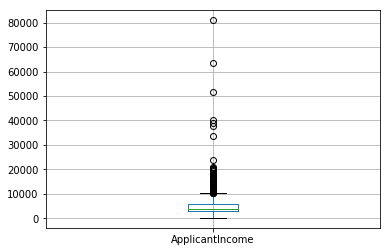

In [11]:
df.boxplot(column='ApplicantIncome')

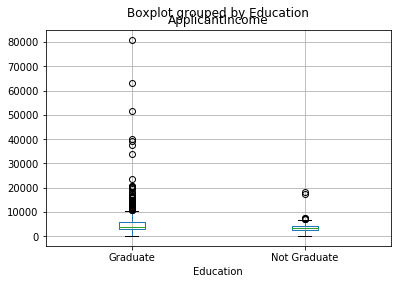

In [12]:
df.boxplot(column = 'ApplicantIncome', by ='Education')

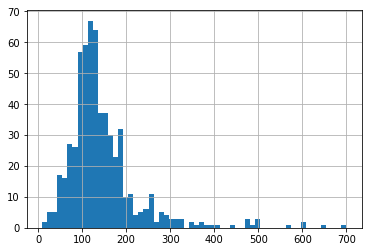

In [13]:
df['LoanAmount'].hist(bins=60)

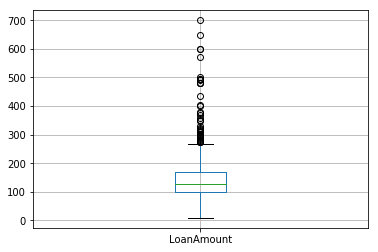

In [14]:
df.boxplot(column = 'LoanAmount')

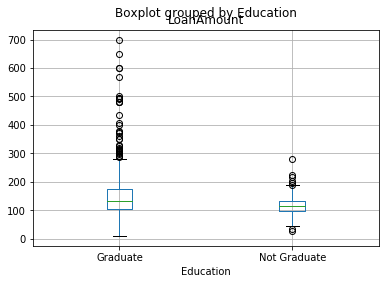

In [15]:
df.boxplot(column = 'LoanAmount', by='Education')

In [16]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values = 'Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print("Frequency Table for credit History:")
print(temp1)

print("\nProbability of getting loan for each Credit History class:")
print(temp2)

Frequency Table for credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

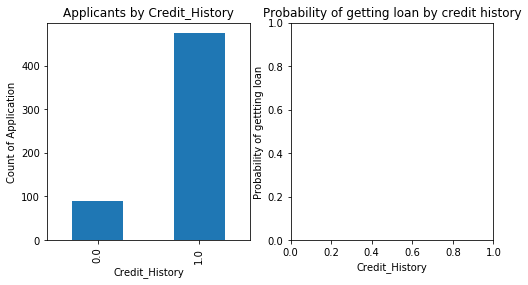

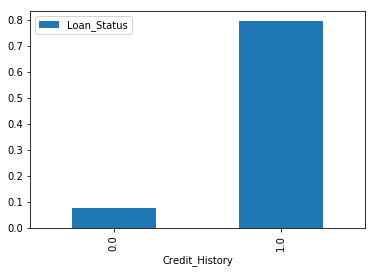

In [17]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Application')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of gettting loan')
ax2.set_title("Probability of getting loan by credit history")

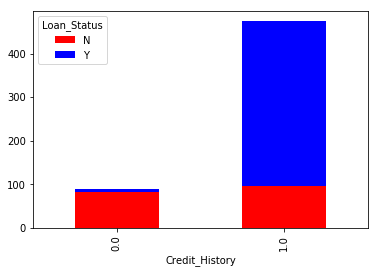

In [18]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked =True, color = ['red','blue'], grid=False)

In [19]:
temp3 = pd.crosstab(df['Credit_History'],df['Gender'], df['Loan_Status'])aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp3.plot(kind='bar', stacked =True, color = ['red','blue'], grid=False)

SyntaxError: invalid syntax (<ipython-input-19-a0074d853e6c>, line 1)

In [20]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

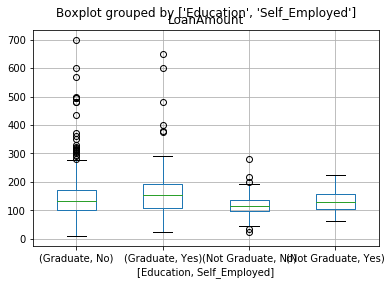

In [22]:
df.boxplot(column = 'LoanAmount', by=['Education', 'Self_Employed'])

In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df['Self_Employed'].fillna('NO', inplace=True)

In [25]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [26]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
# Replace missing values
df['LoanAmount'].fillna((df['LoanAmount'].isnull()).apply(fage), inplace=True)

TypeError: 'bool' object is not subscriptable

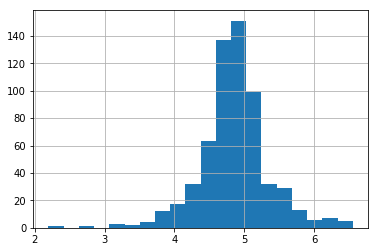

In [27]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

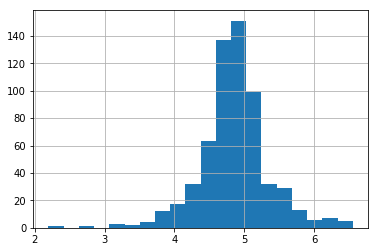

In [28]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

In [29]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [30]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [31]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [33]:
def classification_model(model, data, predictors, outcome):
    #Fit the model
    model.fit(data[predictors],data[outcome])
    
    #Make predication on training set:
    predictions = model.predict(data[predictors])
    
    #print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #perform k-fold cross-validation with 5 folds
    X = data.shape[0]
    kf = KFold(n_splits=5)
    kf.get_n_splits(data.shape[0])
    KFold(n_splits=5, random_state=None, shuffle=False)
    error = []
    for train, test in enumerate(KFold.split(X)):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :1])
        
        #The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
        
        #training the algorithm using the predictors and target:
        model.fit(train_predictors, train_target)
        
        #record error from each cross_validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print("Cross_validation Score: %s" % "{0:.3%}".format(np.mean(error)))
    # fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [35]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.945%


/home/radhey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: split() missing 1 required positional argument: 'X'

In [36]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%


/home/radhey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: split() missing 1 required positional argument: 'X'